# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


# Data Validation 

The dataset contains **947 rows** and **8 columns**. I have validated all the columns against the criteria in the dataset table:

- recipe: Same as description without missing values. all unique
- calories: Same as description Missing 52 values filled with categorical mean
- carbohydrate: Same as description Missing 52 values  filled with categorical mean
- sugar: Same as description Missing 52 values  filled with categorical mean
- protein: Same as description Missing 52 values  filled with categorical mean
- category:  Same as description. No missing values. 11 different values. Breakfast, Chicken Breast, Beverages, Lunch/Snack, Potato, Pork, Vegetable,Dessert, Meat, Chicken, One Dish Meal 
- servings: Had to switch from object to int.. Replaced ‘4 as a snack’ and ‘6 as a snack’ to  4 and 6
- high_traffic :  Same as description. Converted to 1 for High and 0 for nulls.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('recipe_site_traffic_2212.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Cleaning Numerical Variables

### Fixing servings variable

Servings should be a int not an object 

In [2]:
print(data['servings'].unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


4 as a snack and 6 as a snack cannot be turned into an int. I will set them to 4 and 6

In [3]:
data['servings'] = data['servings'].replace({'4 as a snack': 4, '6 as a snack': 6})

In [4]:
data['servings']=data['servings'].astype(int)

### Missing calories,carbhoydratre,sugar and protein values

There are 52 rows that are missing values in calories,carbohydrates,sugar and protein. I filled those nulls with the mean of the column based on the category the recipe was in

In [5]:
# Calculate mean values by category
pivot_table = data.pivot_table(index='category', values=['calories', 'carbohydrate', 'sugar', 'protein'], aggfunc='mean')

# Iterate over each column
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    # Fill in missing values with mean values by category
    data[col] = data[col].fillna(data['category'].map(pivot_table[col]))

    
print(pivot_table)

                  calories  carbohydrate    protein      sugar
category                                                      
Beverages       177.732174     15.955978   0.594783  12.537283
Breakfast       331.880000     39.711698  16.957170   7.552264
Chicken         566.732029     30.751304  41.843913   5.678261
Chicken Breast  540.338511     21.833191  52.161383   5.098723
Dessert         351.402078     55.661818   5.759870  35.228442
Lunch/Snacks    478.848537     42.820976  19.610976   5.309146
Meat            584.533784     22.159595  40.377027   5.813649
One Dish Meal   579.090000     50.383433  35.926418   6.011642
Pork            629.708082     28.076164  43.797671   8.040137
Potato          425.068554     58.150361   8.574217   3.718916
Vegetable       245.014872     23.679359   7.891923   5.065128


## Cleaning Categorical Variables

In [6]:
cat = ['category','high_traffic']
for column in cat:
  print(data[column].value_counts())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
High    574
Name: high_traffic, dtype: int64


### Adjusting high_traffic

Chaning the high traffic column to 1 for high traffic and 0 for null to help in future analysis.

In [7]:
data['high_traffic'].replace('High',1,inplace=True)
data['high_traffic']=data['high_traffic'].fillna(0).astype(int)

# Exploratory Analysis

In the first graph , we observe that the data set contains more high traffic recipes than non-high traffic ones (574 vs 373).

Moving on to the second graph, we note that the Breakfast category has the highest number of recipes (106 or 11%), while the OneDish category has the lowest (71 or 8%). Overall, the categories appear to be fairly evenly distributed in terms of recipe counts, suggesting that they should not introduce bias into the data.

The third graph illustrates that there is significant variability in the number of high traffic recipes across categories. To address this variance, we plan to scale the data during modelling.

Graphs 4 to 7 provide boxplots that depict the distribution of four key columns (sugar, calories, carbohydrates, and protein) both with and without outliers. For each of these columns, I also created separate boxplots that compare the distribution of values for high traffic recipes versus non-high traffic ones, with outliers removed for readability.

I decided to remove outliers in order to make the boxplots easier to read. I believe that the data may benefit from further scrutiny by a subject matter expert, as there were some values (such as in recipe 541) that appeared potentially erroneous. Lacking expertise in the domain, we left such values unchanged.

Across all four columns, we observed similar median values for high traffic and non-high traffic recipes.


[Text(0.5, 1.0, 'Graph 1 Countplot of High Traffic')]

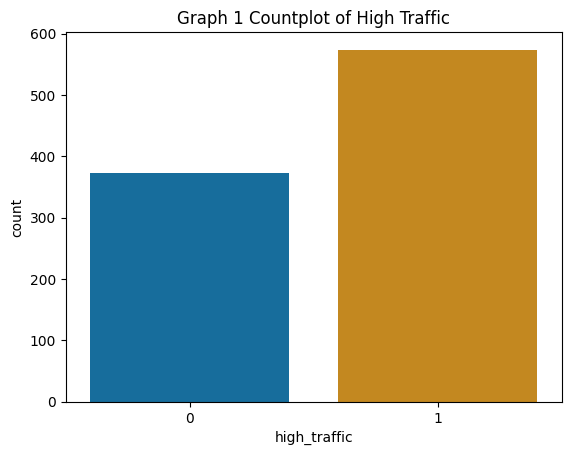

In [8]:
plt.clf()
plt.rcParams["figure.figsize"] = [6.00, 4.0]
sns.countplot(x='high_traffic', data=data,palette='colorblind').set(title='Graph 1 Countplot of High Traffic')


[Text(0.5, 1.0, 'Graph 2 Countplot of Categories')]

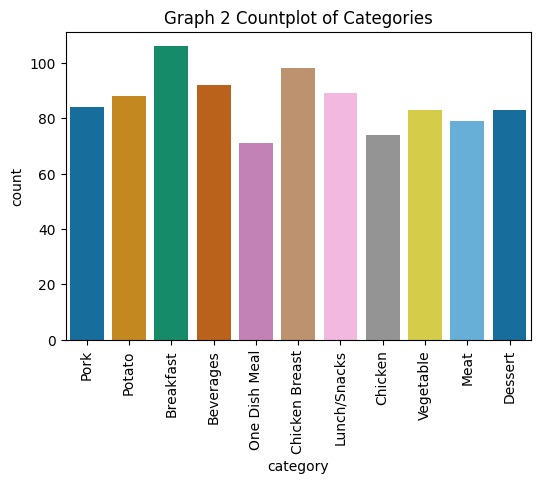

In [9]:
plt.clf()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [6.00, 4.0]
sns.countplot(x='category',data=data,palette='colorblind').set(title='Graph 2 Countplot of Categories')


[Text(0.5, 1.0, 'Graph 3 Countplot of Categories and High Traffic')]

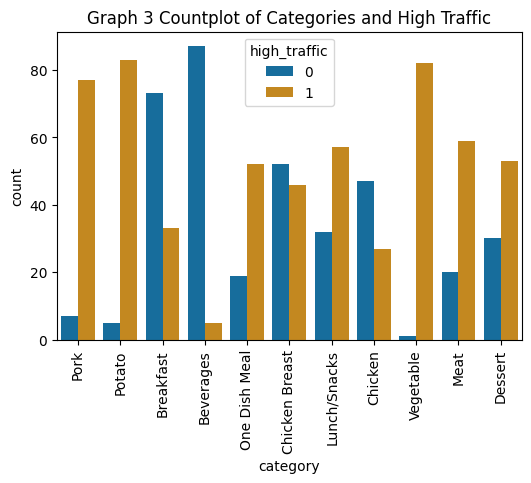

In [10]:
plt.clf()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = [6.00, 8.0]
sns.countplot(x='category',hue='high_traffic',data=data,palette='colorblind').set(title='Graph 3 Countplot of Categories and High Traffic')

<AxesSubplot: xlabel='high_traffic', ylabel='protein'>

<Figure size 600x800 with 0 Axes>

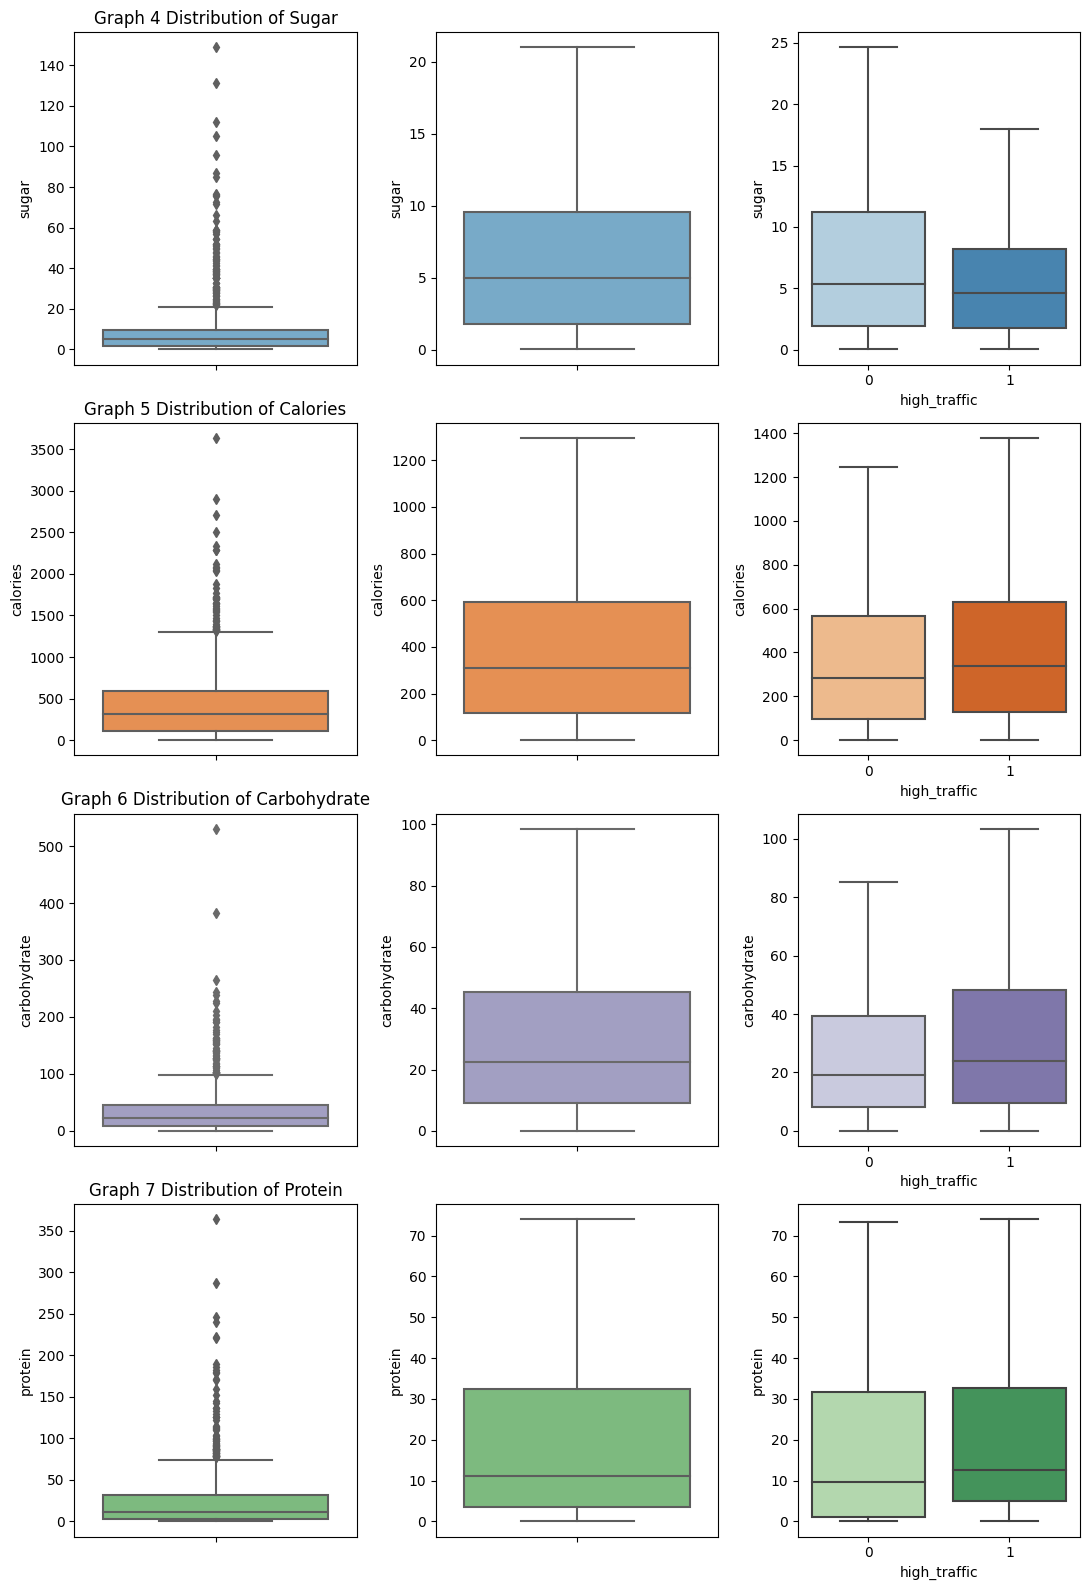

In [11]:
plt.clf()
plt.rcParams["figure.figsize"] = [11.00, 16.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 3)

sns.boxplot(y='sugar',data=data,ax=axes[0,0],palette="Blues").set(title='Graph 4 Distribution of Sugar')
sns.boxplot(y='sugar',data=data,showfliers = False,ax=axes[0,1],palette="Blues")
sns.boxplot(y='sugar',x='high_traffic',data=data,showfliers = False,ax=axes[0,2],palette="Blues")

sns.boxplot(y='calories',data=data,ax=axes[1,0],palette="Oranges").set(title='Graph 5 Distribution of Calories')
sns.boxplot(y='calories',data=data,showfliers = False,ax=axes[1,1],palette="Oranges")
sns.boxplot(y='calories',x='high_traffic',data=data,showfliers = False,ax=axes[1,2],palette="Oranges")

sns.boxplot(y='carbohydrate',data=data,ax=axes[2,0],palette="Purples").set(title='Graph 6 Distribution of Carbohydrate')
sns.boxplot(y='carbohydrate',data=data,showfliers = False,ax=axes[2,1],palette="Purples")
sns.boxplot(y='carbohydrate',x='high_traffic',data=data,showfliers = False,ax=axes[2,2],palette="Purples")

sns.boxplot(y='protein',data=data,ax=axes[3,0],palette="Greens").set(title='Graph 7 Distribution of Protein')
sns.boxplot(y='protein',data=data,showfliers = False,ax=axes[3,1],palette="Greens")
sns.boxplot(y='protein',x='high_traffic',data=data,showfliers = False,ax=axes[3,2],palette="Greens")

In [12]:
plt.clf()

<Figure size 1100x1600 with 0 Axes>

# Model Development

Predicting whether a recipe will have high traffic or not is a classification problem in machine learning.

I have chosen the **Logistic Regression model** as my baseline model because it is a suitable option for predicting binary output variables, such as whether a recipe will be high traffic or not. As for the comparison model, I have opted for the **Gradient Boosting Classifier**. This model combines multiple decision trees to make predictions. It works by iteratively improving the model by focusing on the samples that were previously misclassified.

In [13]:
#import ML models and peformance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

In [14]:
#getting features 
features = data.drop(columns='high_traffic')
#getting dummies for categorical columns 
X = pd.get_dummies(features, columns=['calories','carbohydrate','sugar','protein','category','servings'])
y = data['high_traffic']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8052)

scalling vaues with RobustScaler becahse it its more robust to outliers then other scalers. We saw above this dataset has outliers.

In [16]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Model - Logistic Regression Model

In [17]:
# Create a Logistic Regression model
logreg = LogisticRegression()
# Fit the model to the data
logreg.fit(X_train, y_train)
# Predict on the data
log_predictions = logreg.predict(X_test)

## Comparision Model - Gradient Boosting Classifier 

In [18]:
# Create a GradientBoostingClassifier model
gbm = GradientBoostingClassifier()
# Fit the model to the data
gbm.fit(X_train, y_train)
# Predict on the data
gbm_predictions = gbm.predict(X_test)

# Model Evaluation

I have chosen to evaluate the model based on its **accuracy** because it provides a simple and straightforward interpretation. Accuracy measures the proportion of correct predictions out of all predictions made.

Based on the accuracy metric, the Gradient Boosting Classifier outperforms the Logistic Regression model with an accuracy of 0.76 compared to 0.75.

However, despite trying various approaches, I was unable to achieve an accuracy of 80% using the available data. 


## Evaluating Logistic Regression model

In [19]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       115
           1       0.76      0.84      0.80       170

    accuracy                           0.75       285
   macro avg       0.74      0.72      0.73       285
weighted avg       0.74      0.75      0.74       285



## Evaluting Gradient Boosting Classifier

In [20]:
print(classification_report(y_test, gbm_predictions))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       115
           1       0.74      0.87      0.80       170

    accuracy                           0.74       285
   macro avg       0.74      0.71      0.71       285
weighted avg       0.74      0.74      0.73       285



#  Business Metric

For a business metric I suggest  motoring the click-through rate (CTR) of the recipes displayed on the homepage.e. The CTR is the ratio of clicks to impressions, and in this context, it would be the percentage of website visitors who click on the recipe displayed on the homepage out of the total number of visitors who see the recipe. This will indicate how engaging and relevant the recipe is to the website visitor.

We can estimate the initial value for the CTR metric as follows:

Total number of impressions: Since we don't have information on the number of impressions, we can assume that the number of high traffic recipes is proportional to the number of impressions. 

**Total number of impressions** = (Total number of recipes / Number of high traffic recipes) x Number of high traffic recipes

**Total number of impressions** = (947 / 574) x 574

**Total number of impressions **= 947

Therefore, the total number of impressions is estimated to be 947.

Estimated CTR:

**CTR **= (Number of high traffic recipes / Total number of recipes) x 100

**CTR** = (574 / 947) x 100

**CTR** = 60.6%

Therefore, the estimated initial value for the CTR metric is 60.6%.

We can use this estimated initial value  to monitor the performance of future recipes on the homepage. If the CTR of a recipe is higher than the estimated initial value, it indicates that the recipe is more engaging and relevant to the website visitor, and vice versa.


# Recommendations

My recommendations are 
- The data should be  proofed to in order to catch any errors in the measurements. 
- Start tracking  the click-through rate for recipes on the same page. This should be recorded for future analysis.
- We could also consider incorporating user feedback and engagement metrics (such as comments, likes, and shares) to continuously improve the recipe selection and display process.